### Machine Learning Application on dataset

In [4]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
#Define the file name
file = "CH4_H2 Finall - Figshare.xlsx"

#Define the sheet
sheet = "70%H2-30%CH4 "
df = pd.read_excel(file, sheet_name=sheet)

#Visualize the first five rows
print(df.head())

  Feed Composition mole%  Unnamed: 1 Unnamed: 2  Pressure (Mpa)   
0                    NaN         NaN        NaN            0.01  \
1                     H2        70.0          %            1.00   
2                    CH4        30.0          %            2.00   
3                    NaN         NaN        NaN            3.00   
4                    NaN         NaN        NaN            4.00   

   Temperature (K)  Gas Density (Kg/M3)  Gas viscosity(cp)   
0            200.0             0.037430           0.008569  \
1            200.0             3.758872           0.008545   
2            200.0             7.545535           0.008522   
3            200.0            11.353053           0.008537   
4            200.0            15.173972           0.008637   

   Gas thermal conductivity  (W/m.K)  Gas thermal capacity(J/kg.K)   
0                           0.058565                    4684.42020  \
1                           0.060122                    4762.49197   
2             

### A. Data Wrangling

In [6]:
columns = df.columns
print (columns)

Index(['Feed Composition mole%', 'Unnamed: 1', 'Unnamed: 2', 'Pressure (Mpa)',
       'Temperature (K)', 'Gas Density (Kg/M3)', 'Gas viscosity(cp)',
       'Gas thermal conductivity  (W/m.K)', 'Gas thermal capacity(J/kg.K)',
       'Gas enthalpy(J/kg)', 'Gas entropy(J/kg.K) '],
      dtype='object')


In [7]:
#drop first three columns
df = df.iloc[:, 3:]
#Visaulize available columns
df.head()
columns = df.columns
print (columns)

Index(['Pressure (Mpa)', 'Temperature (K)', 'Gas Density (Kg/M3)',
       'Gas viscosity(cp)', 'Gas thermal conductivity  (W/m.K)',
       'Gas thermal capacity(J/kg.K)', 'Gas enthalpy(J/kg)',
       'Gas entropy(J/kg.K) '],
      dtype='object')


In [8]:
df.shape

(1616, 8)

### B. Data Exploration

In [9]:
df.describe()

,Pressure (Mpa),Temperature (K),Gas Density (Kg/M3),Gas viscosity(cp),Gas thermal conductivity (W/m.K),Gas thermal capacity(J/kg.K),Gas enthalpy(J/kg),Gas entropy(J/kg.K)
count,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1.616000e+03,1616.000000
mean,50.000099,350.000000,82.444281,0.013855,0.131290,5628.801343,2.862906e+05,-6654.344174
std,29.163614,92.223984,44.205626,0.001672,0.022870,184.145564,5.186108e+05,2333.592214
min,0.010000,200.000000,0.014971,0.008522,0.058565,4684.420200,-6.032874e+05,-11109.966000
25%,25.000000,275.000000,47.653376,0.013057,0.116678,5586.854143,-1.436130e+05,-8223.006050
50%,50.000000,350.000000,84.764673,0.013755,0.134688,5666.048480,2.979216e+05,-6665.446150
75%,75.000000,425.000000,114.324549,0.014883,0.148323,5731.074107,7.349461e+05,-5432.411350
max,100.000000,500.000000,184.217456,0.020807,0.175946,5921.088890,1.240937e+06,6588.963710


In [10]:
## Identify missing values
df.isna().sum()

Pressure (Mpa)                       0
Temperature (K)                      0
Gas Density (Kg/M3)                  0
Gas viscosity(cp)                    0
Gas thermal conductivity  (W/m.K)    0
Gas thermal capacity(J/kg.K)         0
Gas enthalpy(J/kg)                   0
Gas entropy(J/kg.K)                  0
dtype: int64

In [11]:
### We would use a machine learning algorithm to deal with the missing values
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [12]:
df = df.dropna()
df.isna().sum()

Pressure (Mpa)                       0
Temperature (K)                      0
Gas Density (Kg/M3)                  0
Gas viscosity(cp)                    0
Gas thermal conductivity  (W/m.K)    0
Gas thermal capacity(J/kg.K)         0
Gas enthalpy(J/kg)                   0
Gas entropy(J/kg.K)                  0
dtype: int64

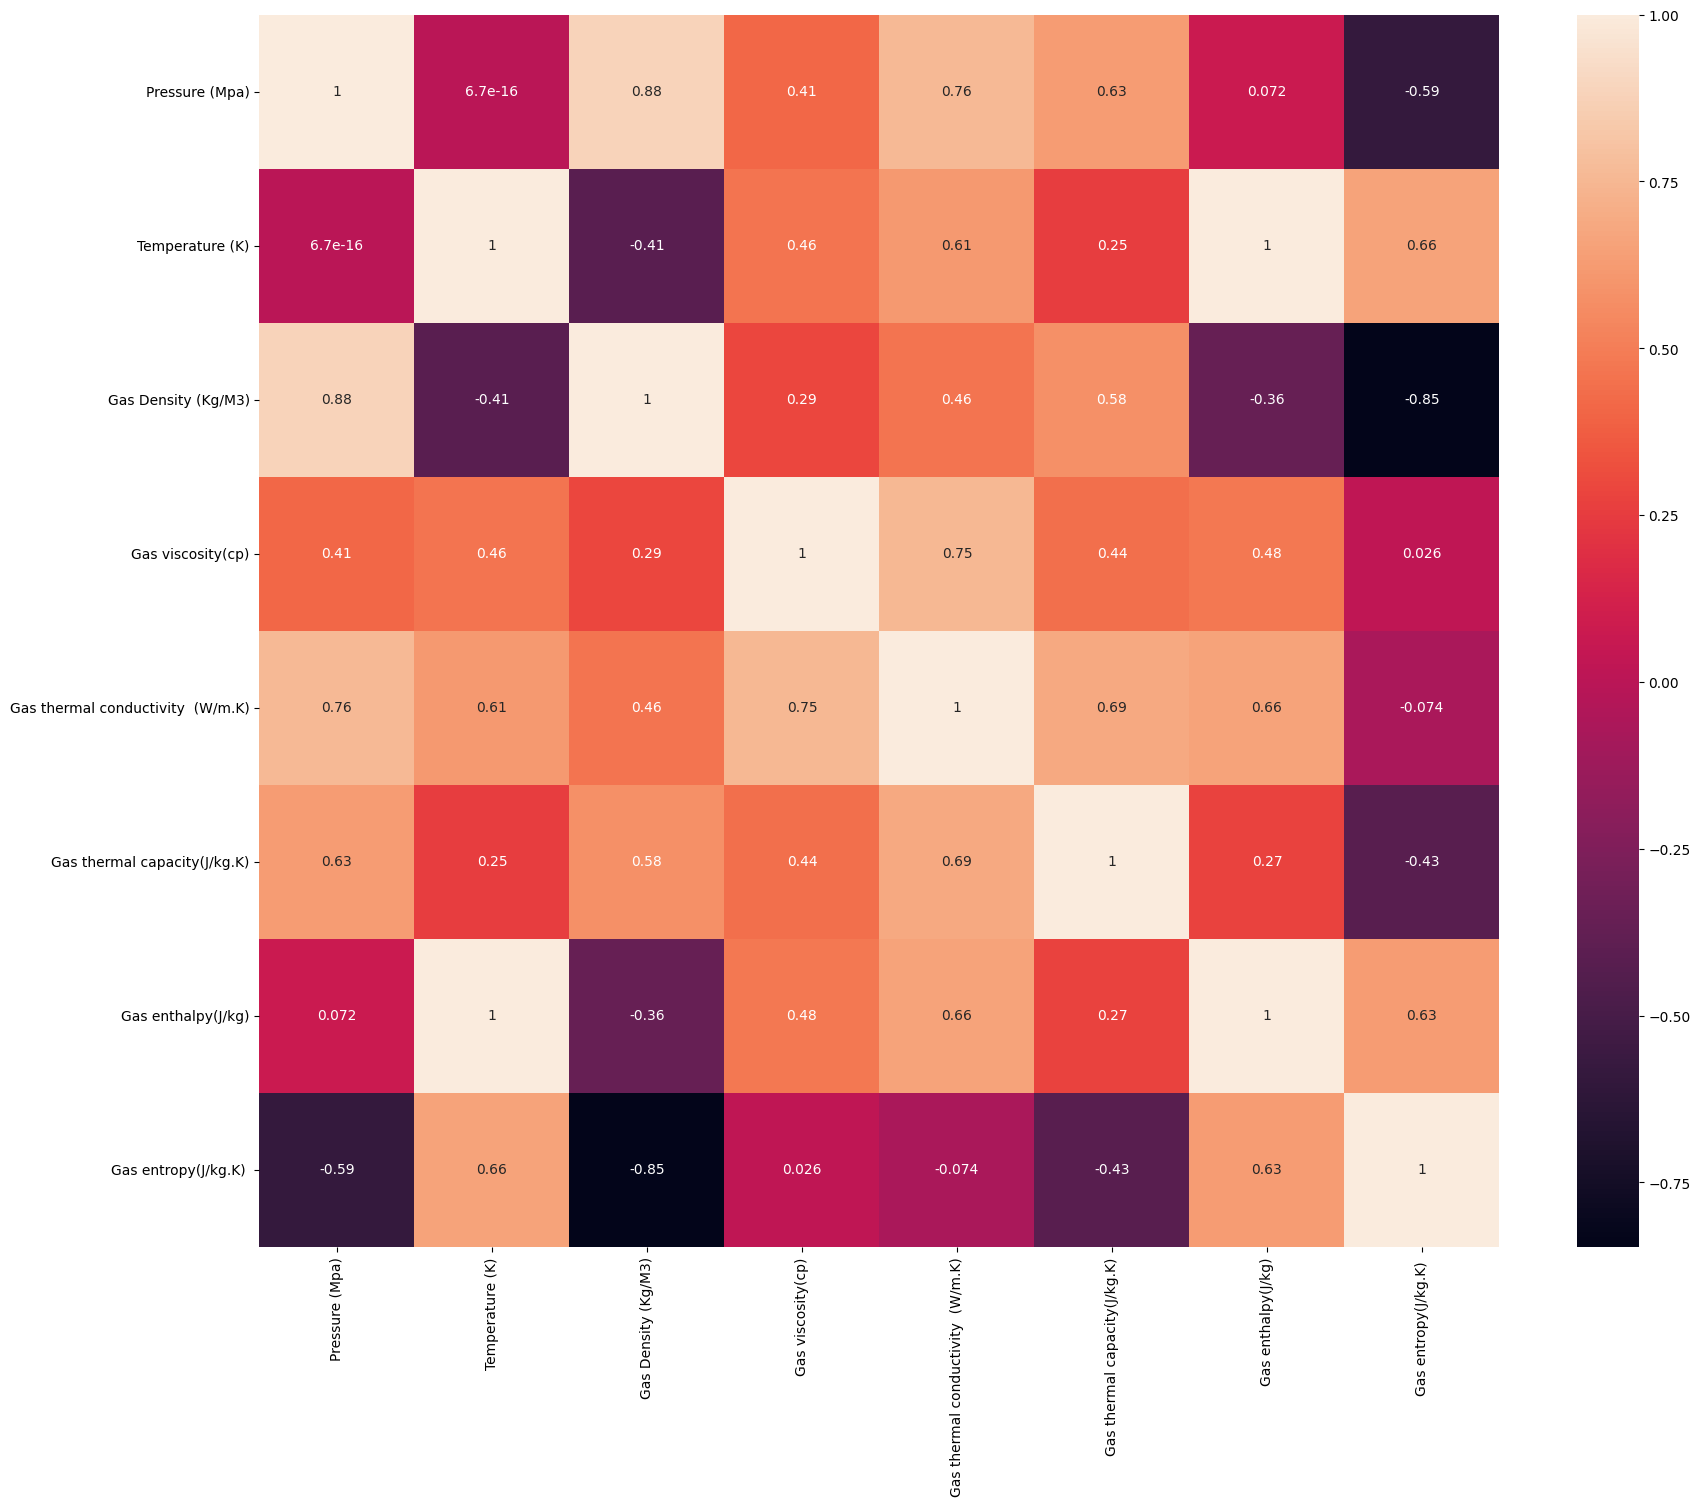

In [13]:
plt.figure (figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pressure (Mpa)                     1616 non-null   float64
 1   Temperature (K)                    1616 non-null   float64
 2   Gas Density (Kg/M3)                1616 non-null   float64
 3   Gas viscosity(cp)                  1616 non-null   float64
 4   Gas thermal conductivity  (W/m.K)  1616 non-null   float64
 5   Gas thermal capacity(J/kg.K)       1616 non-null   float64
 6   Gas enthalpy(J/kg)                 1616 non-null   float64
 7   Gas entropy(J/kg.K)                1616 non-null   float64
dtypes: float64(8)
memory usage: 101.1 KB


In [15]:
df.columns

Index(['Pressure (Mpa)', 'Temperature (K)', 'Gas Density (Kg/M3)',
       'Gas viscosity(cp)', 'Gas thermal conductivity  (W/m.K)',
       'Gas thermal capacity(J/kg.K)', 'Gas enthalpy(J/kg)',
       'Gas entropy(J/kg.K) '],
      dtype='object')

In [16]:
## let predict the viscocity of the liquid
df = pd.get_dummies(df)
X = df[['Pressure (Mpa)', 'Temperature (K)', 'Gas Density (Kg/M3)',
       'Gas thermal conductivity  (W/m.K)',
       'Gas thermal capacity(J/kg.K)', 'Gas enthalpy(J/kg)',
       'Gas entropy(J/kg.K) ']]
print (X)
y = df['Gas viscosity(cp)']
print (y)

      Pressure (Mpa)  Temperature (K)  Gas Density (Kg/M3)   
0               0.01            200.0             0.037430  \
1               1.00            200.0             3.758872   
2               2.00            200.0             7.545535   
3               3.00            200.0            11.353053   
4               4.00            200.0            15.173972   
...              ...              ...                  ...   
1611           96.00            500.0           101.337736   
1612           97.00            500.0           102.073988   
1613           98.00            500.0           102.805833   
1614           99.00            500.0           103.533319   
1615          100.00            500.0           104.256493   

      Gas thermal conductivity  (W/m.K)  Gas thermal capacity(J/kg.K)   
0                              0.058565                    4684.42020  \
1                              0.060122                    4762.49197   
2                              0.061

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()

}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Convert DataFrame to a NumPy array
    y_pred = cross_val_predict(model, X, y, cv=5)  # Perform 5-fold cross-validation
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2, 'Predictions': y_pred}

# Display the results and visualize the predictions
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']:.20f}")
    print(f"R^2: {metrics['R^2']:.20f}")
    print()

#     # Plot the actual vs. predicted values
#     plt.scatter(X, y, label='Actual')
#     plt.scatter(X, metrics['Predictions'], label='Predicted', marker='x')
#     plt.title(f"{model_name} - Actual vs. Predicted")
#     plt.xlabel('X')
#     plt.ylabel('y')
#     plt.legend()
#     plt.show()

# You can also visualize the results or choose a specific metric for comparison



Model: Linear Regression
MSE: 0.00000017277408067147
R^2: 0.93818190611516161237

Model: Decision Tree Regression
MSE: 0.00000069534387753583
R^2: 0.75120786094360081364

Model: Random Forest Regression
MSE: 0.00000066521960434471
R^2: 0.76198624356386424061

Model: Support Vector Regression
MSE: 0.00000311753234035896
R^2: -0.11544455138377718306

